# 机2单变量线性回归
根据城市人口数量，预测开小吃店的利润
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

In [1]:
import numpy as np #Numpy是使用C语言实现的一个数据计算库，它用来处理相同类型，固定长度的元素。
#使用numpy操作数据时，系统运行的速度比使用python代码快很多。numpy中还提供了很多的数据处理函数，例如傅里叶变化，矩阵操作，数据拟合等操作
import pandas as pd #Pandas 是基于NumPy 的一种工具，该工具是为了解决数据分析任务而创建的。
#Pandas纳入了大量库和一些标准的数据模型，提供了大量能使我们快速便捷地处理数据的函数和方法
import matplotlib.pyplot as plt #2D绘图库。提供一个类似matlab的绘图框架

In [2]:
data = pd.read_csv('data.txt', header=None, names=['mins', 'findpicks']) #header:指定标题行
data.head() #head函数可以默认读取前5行的数据

,mins,findpicks
0,443,50
1,436,51
2,437,50
3,441,48
4,433,47


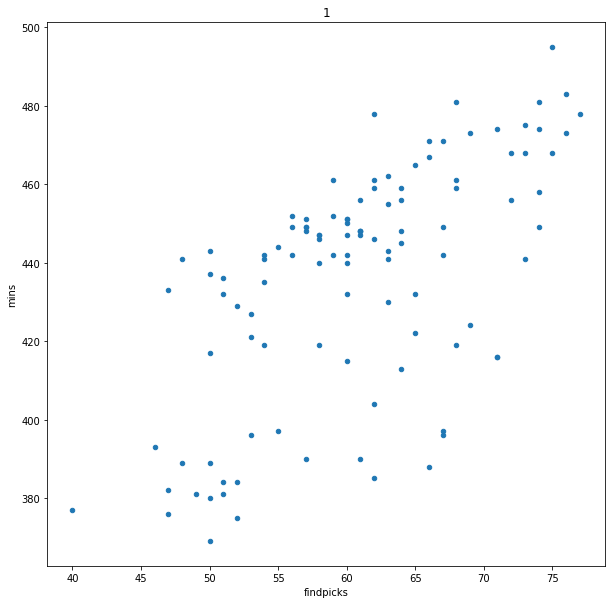

In [29]:
data.plot(kind='scatter',title='1',x='findpicks',y='mins',figsize=(10,10)) #scatter:散点图 figsize：宽高
plt.show()

#### 梯度下降
这个部分需要在现有数据集上，训练线性回归的参数θ

In [4]:
#定义costFunction
def computeCost(X,y,theta): 
    inner=np.power((X*theta.T)-y,2) #power(x, y):计算 x 的 y 次方,theta.T:theta的转置
    return np.sum(inner)/(2*len(X))  #len:字符串长度

In [5]:
data.insert(0,'Ones',1) #在data的第0列插入1，名为Ones，用于更新θ0

In [6]:
#变量初始化
cols=data.shape[1] #读取data列数 若shape[0]则是行数
X=data.iloc[:,:-1] #X是data里的除最后列，前面的冒号就是取行数，后面的冒号是取列数
y=data.iloc[:,2:] #y是data最后一列 

In [7]:
X.head()

,Ones,mins
0,1,443
1,1,436
2,1,437
3,1,441
4,1,433


In [8]:
y.head()

,findpicks
0,50
1,51
2,50
3,48
4,47


In [9]:
X=np.matrix(X.values) #用于从类数组对象或数据字符串返回矩阵
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))

In [10]:
X.shape,y.shape,theta.shape,theta

((110, 2), (110, 1), (1, 2), matrix([[0, 0]]))

In [11]:
computeCost(X,y,theta)

1876.1772727272728

#### 梯度下降

一个检查梯度下降是不是在正常运作的方式，是打印出每一步J()的值，看他是不是一直都在减小，并且最后收敛至一个稳定的值。
最后的结果会用来预测小吃店在35000及70000人城市规模的利润

In [12]:
#θ更新
def gradientDescent(X,y,theta,alpha,iters): #X:人口，y：利润，theta：[θ0，θ1]初始化为[0,0]，alpha:学习率，iters：迭代次数
    temp=np.matrix(np.zeros(theta.shape)) #返回来一个theta形状和类型的用0填充的数组
    parameters=int(theta.ravel().shape[1]) #将数组维度拉成一维数组，取列数（2），θ的数量
    cost=np.zeros(iters) #初始化
    
    for i in range(iters): #迭代1500次
        error=(X*theta.T)-y  #每次迭代都检查J（θ）的值
        
        for j in range(parameters):
            term=np.multiply(error,X[:,j]) #j=0时相当于都*1
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term)) #len:字符串长度即m，更新θ
            
        theta=temp #确定本次迭代的θ
        cost[i]=computeCost(X,y,theta)
        
    return theta,cost

In [13]:
alpha=0.01
iters=45

In [14]:
g,cost=gradientDescent(X,y,theta,alpha,iters)
g

matrix([[1.40701726e+144, 6.16494214e+146]])

In [15]:
predict1=[1,3.5]*g.T
print("predict1:",predict1)
predict2=[1,7]*g.T
print("predict2:",predict2)

predict1: [[2.15913677e+147]]
predict2: [[4.31686652e+147]]


In [16]:
X.shape,y.shape

((110, 2), (110, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

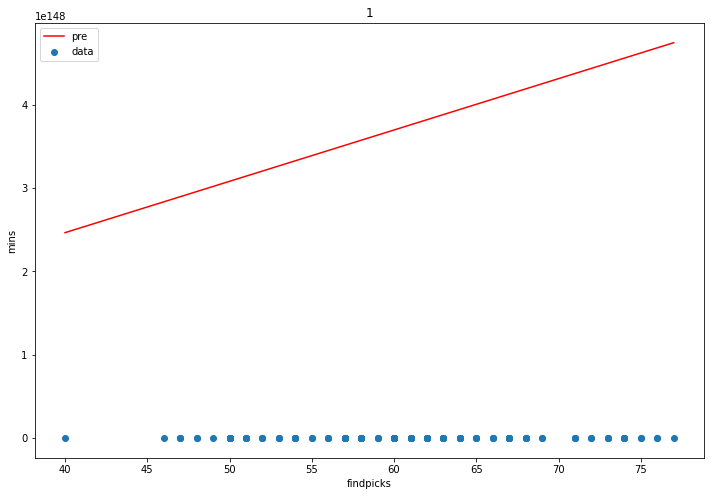

In [31]:
x=np.linspace(data.findpicks.min(),data.findpicks.max(),110) #创建等差数列
f=g[0,0]+(g[0,1]*x)
fig,ax=plt.subplots(figsize=(12,8)) #fig:绘图窗口(Figure),ax:绘图窗口上的坐标系(axis),figsize:子图的宽度和高度
ax.plot(x,f,'r',label='pre') #'r':红线，label：定义图例
ax.scatter(data.findpicks,data.mins,label='data') #散点图                                                                                                                                                                                                                                                                                                                                  
ax.legend(loc=2) #在图上标明一个图例，用于说明每条曲线的文字显示，loc参数，用于控制图例的所在象限
ax.set_xlabel('findpicks')
ax.set_ylabel('mins')
ax.set_title('1')
plt.show


In [28]:
mins

NameError: name 'mins' is not defined

# 机4多变量线性回归

In [19]:
data2=pd.read_csv('4.txt',header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 特征归一化

In [20]:
#观察数据发现，size变量是bedrooms变量的1000倍大小,统一量级会让梯度下降收敛的更快。做法就是，将每类特征减去他的平均值后除以标准差
data2=(data2-data2.mean())/data2.std() #std:计算标准差
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [21]:
# 加一列常数项
data2.insert(0, 'Ones', 1)

# 初始化X和y
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# 转换成matrix格式，初始化theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# 运行梯度下降算法
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2

matrix([[-4.27553973e-17,  2.90515255e-01,  1.24946003e-01]])

#### 正规方程

In [22]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y #X.T@X等价于X.T.dot(X)，np.linalg.inv()：矩阵求逆
    return theta

In [23]:
final_theta2=normalEqn(X, y)#这里用的是data1的数据
final_theta2

matrix([[-12.86663211],
        [  0.16872326]])